In [0]:
Created on Tue Jan  7 12:52:16 2020

@author: usuario
"""

import pandas as pd
import os
import matplotlib.pyplot as plt
import statistics

#%%
# set the working directory to the map with the data
os.chdir('C:\\Users\\usuario\\Desktop\\IUPWARE_2019-2020\\Environmental_Programming\\Assignment\\Data')
Dir=os.getcwd()

#%% reading data

# read in the table with the wells in the Oligocene layers 
Wells=pd.read_excel('ListWells_Oligocene.xlsx')

# reading all the watertable height data 
Data=[]
for i in Wells.index.tolist():
    try:
        path=str(Dir+'\\'+Wells.loc[i,'gw_id_Filter']+'.xlsx')
        name=pd.read_excel(path)
        Data.append(name)
    except:
        pass
    
    
#%% Filter wells with data in March, April,2019
SpatialTable2=pd.DataFrame(columns=['Well', 'x', 'y', 'MeanGroundwaterLevel2', 'LevelMarchApril2019', 'Difference'])
StartSpring2019=pd.Timestamp(2019,3,1)
EndSpring2019=pd.Timestamp(2019,4,30)

for i in range(0,520):
    if Data[i].count()[0]>1: # so that wells with only one measurement are not taken into account
        LevelsMarchApril=[]      
        for k in Data[i].index.tolist():
            if StartSpring2019<Data[i].iloc[k,16]<EndSpring2019:
                LevelsMarchApril.append(Data[i].iloc[k,18])         
        try:
            LevelsMarchApril2019=statistics.mean(LevelsMarchApril)
            SpTi=pd.DataFrame([Data[i].iloc[0,3],Data[i].iloc[0,6], Data[i].iloc[0,7],Data[i].mean()[-2],LevelsMarchApril2019,LevelsMarchApril2019 - Data[i].mean()[-2]], index=['Well', 'x', 'y', 'MeanGroundwaterLevel2', 'LevelMarchApril2019','Difference'])
            SpTi=SpTi.transpose()
            SpatialTable2=SpatialTable2.append(SpTi)
        except:
            pass
    
       
#%% MAP the diference between March-April 2019 and the average groundwater level.
import numpy as np
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt


from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

import geopandas as gdp

df= SpatialTable2

lons=np.array(df['x']) 
lats=np.array(df['y']) 
data=np.array(df['Difference'])

grid_lon= np.arange(160000.0,250000.0,10000.0)
grid_lat= np.arange(160000.0,250000.0,10000.0)

OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian', verbose=True, enable_plotting=False,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)

xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)
fig, ax = plt.subplots(figsize=(10,10))
m=gdp.read_file('C:\\Users\\usuario\\Desktop\\IUPWARE_2019-2020\\Environmental_Programming\\Assignment\\Data\\Groundwaterbodies_Oligocene\\Groundwaterbodies_Oligocene.shp')


x,y=m(xintrp, yintrp) # convert the coordinates into the map scales
ln,lt=m(lons,lats)
cs=ax.contourf(x, y, z1, np.linspace(0, 4500),extend='both',cmap='jet') #plot the data on the map.
cbar=m.colorbar(cs,location='right',pad="7%") #plot the colorbar on the map
# draw parallels.
parallels = np.arange(21.5,26.0,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14, linewidth=0.0) #Draw the latitude labels on the map
 
# draw meridians
meridians = np.arange(119.5,122.5,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14, linewidth=0.0)

## First

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statistics

In [2]:
# read in the table with the wells in the Oligocene layers 
Wells = pd.read_excel('Data/ListWells_Oligocene.xlsx')

In [3]:
# reading all the watertable height data 
Data=[]
for i in Wells.index.tolist():
    try:
        path = os.path.join("Data", Wells.loc[i,'gw_id_Filter']+'.xlsx')
        name = pd.read_excel(path)
        Data.append(name)
    except:
        pass

In [4]:
#%% Filter wells with data in March, April,2019
SpatialTable2 = pd.DataFrame(columns=['Well', 'x', 'y', 'MeanGroundwaterLevel2', 'LevelMarchApril2019', 'Difference'])
StartSpring2019 = pd.Timestamp(2019,3,1)
EndSpring2019 = pd.Timestamp(2019,4,30)

In [5]:
for i in range(0,520):
    if Data[i].count()[0] > 1: # so that wells with only one measurement are not taken into account
        LevelsMarchApril=[]      
        for k in Data[i].index.tolist():
            if StartSpring2019 < Data[i].iloc[k,16] < EndSpring2019:
                LevelsMarchApril.append(Data[i].iloc[k,18])         
        try:
            LevelsMarchApril2019 = statistics.mean(LevelsMarchApril)
            SpTi = pd.DataFrame([Data[i].iloc[0,3],Data[i].iloc[0,6], Data[i].iloc[0,7],Data[i].mean()[-2],LevelsMarchApril2019,LevelsMarchApril2019 - Data[i].mean()[-2]], index=['Well', 'x', 'y', 'MeanGroundwaterLevel2', 'LevelMarchApril2019','Difference'])
            SpTi = SpTi.transpose()
            SpatialTable2 = SpatialTable2.append(SpTi)
        except:
            pass

In [9]:
len(SpatialTable2)

36

In [14]:
SpatialTable2

,Well,x,y,MeanGroundwaterLevel2,LevelMarchApril2019,Difference
0,2-0031,175109,188210,10.3368,10.54,0.203213
0,2-0031,175109,188210,10.2922,10.43,0.137828
0,1-1102a,164062,201339,-3.70641,-3.27,0.43641
0,1-1106,177627,191232,6.27221,7.06,0.787789
0,1-1113,163620,206993,4.24725,4.05,-0.197246
0,2-0421,180790,176231,48.0528,47.34,-0.712768
0,2-0441b,177337,182788,13.8508,13.39,-0.460751
0,2-0055,179522,187706,13.0469,12.54,-0.506944
0,2-0105,200075,189385,19.4663,19.51,0.0437377
0,7-0218,202685,184487,19.3055,18.35,-0.955467


## Second

In [61]:
#%% MAP the diference between March-April 2019 and the average groundwater level.
import numpy as np
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

import geopandas as gdp

from mpl_toolkits.basemap import Basemap

In [194]:
df = SpatialTable2

lons = np.array(df['x']) 
lats = np.array(df['y']) 
data = np.array(df['Difference'])

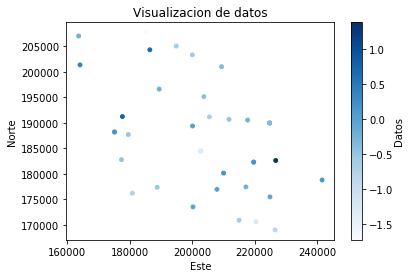

In [195]:
plt.scatter(lons, lats, 15, data, cmap = plt.cm.Blues)
plt.xlabel("Este")
plt.ylabel("Norte")
plt.title("Visualizacion de datos")
cbar = plt.colorbar()
cbar.set_label("Datos", labelpad=+1)
plt.show()

Varianza de los datos

In [196]:
print("Varianza: ", round(data.var(), 2))

Varianza:  0.37


## Kriging

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.24129930846970685
Full Sill: 0.37186204029996484
Range: 6760.270414841775
Nugget: 0.130562731830258 



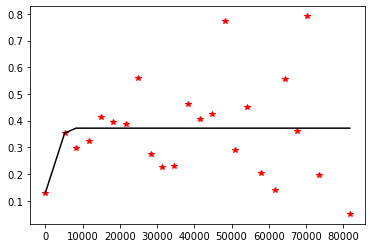

Calculating statistics on variogram model fit...


In [198]:
OK = OrdinaryKriging(lons, lats, data, variogram_model='spherical', nlags=25, verbose=True, enable_plotting=True)
# z1, ss1 = OK.execute('grid', lons, lats)
# xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)
# xintrp, yintrp = np.meshgrid(lons, lats)


In [228]:
grid_x = np.linspace(150000, 250000, num = 100, endpoint = False)
grid_y = np.linspace(160000, 220000, num = 100, endpoint = False)

In [229]:
z, ss = OK.execute('grid', grid_x, grid_y) # z son los datos y ss la varianza

Executing Ordinary Kriging...



In [230]:
kt.write_asc_grid(grid_x, grid_y, z, filename="kriging_ordinario.asc") #Kriging Ordinario en forma de matriz

In [231]:
kt.write_asc_grid(grid_x, grid_y, ss, filename="kriging_ordinario_var.asc") #Varianza de estimación en forma de matriz

In [232]:
asc = pd.read_csv("kriging_ordinario.asc", header=None, skiprows=7, sep="\s+") 
asc.shape #comprobar que sean 70 filas y 80 columnas

(100, 100)

In [233]:
cu2 = np.array(asc) #Conversión pandas dataframe a ndarray

## ploteo del mapa krigging

In [246]:
from descartes import PolygonPatch

In [238]:
gpo = gdp.read_file('Data/Groundwaterbodies_Oligocene/Groundwaterbodies_Oligocene.shp')

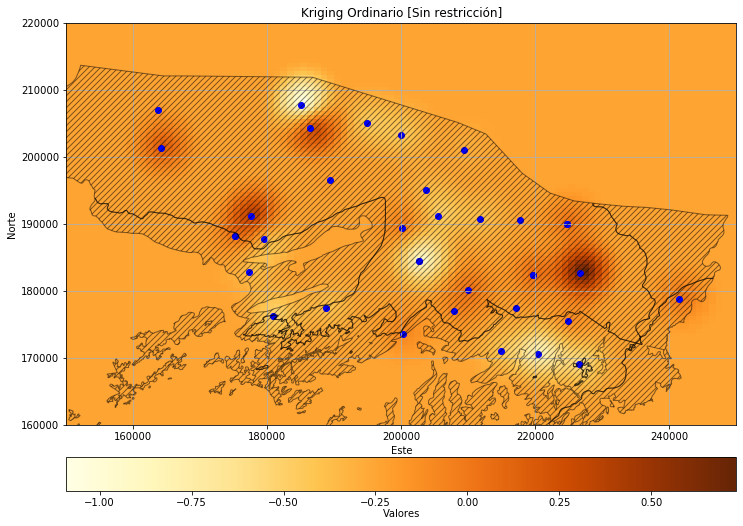

In [263]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()

a = plt.imshow(cu2, cmap=plt.cm.YlOrBr, extent=[150000,250000,160000,220000]) #gist_rainbow
plt.grid(True)
cbar = fig.colorbar(a, orientation='horizontal', pad=0.05)
cbar.set_label("Valores", labelpad=+1)
plt.xlabel('Este')
plt.ylabel('Norte')
plt.title('Kriging Ordinario [Sin restricción]')
ax.scatter(lons, lats, c='blue')
for i in gpo['geometry']:
        ax.add_patch(PolygonPatch(i, fill=False, alpha=0.5, zorder=2, hatch='////'))
plt.show()